In [1]:
# Import packages

import matplotlib.pyplot as plt

import numpy as np

import cometToolkit as ctk

from glob import glob

In [2]:
# Import images

# Biases
biasPaths = glob("../../Data/Bias/*")
biasPaths.sort()

biases = [ctk.GetImage(path) for path in biasPaths]

# Flats
vFlatsPaths = glob("../../Data/Flats/V/*")
vFlatsPaths.sort()

vFlats = [ctk.GetImage(path) for path in vFlatsPaths]

rFlatsPaths = glob("../../Data/Flats/R/*")
rFlatsPaths.sort()

rFlats = [ctk.GetImage(path) for path in rFlatsPaths]

bFlatsPaths = glob("../../Data/Flats/B/*")
bFlatsPaths.sort()

bFlats = [ctk.GetImage(path) for path in bFlatsPaths]

# Darks
darksPaths = glob("../../Data/Darks/*")
darksPaths.sort()

darks = [ctk.GetImage(path) for path in darksPaths]

In [3]:
def MedianStack(imagesList, bias=None):
    """
    Correctly median stacks a list of images by multiplying by the sqrt of the number of images
    """
    biasSubtractedImages = []

    for image in imagesList:
        if bias is not None:
            biasSubtractedImages.append(image - bias)

        else:
            biasSubtractedImages.append(image)

    return np.median(biasSubtractedImages, axis=0)

In [4]:
masterBias = MedianStack(biases)

masterFlat_V = MedianStack(vFlats, bias=masterBias)
masterFlat_R = MedianStack(rFlats, bias=masterBias)
masterFlat_B = MedianStack(bFlats, bias=masterBias)

# normalise
masterFlat_V = masterFlat_V / np.max(masterFlat_V)
masterFlat_R = masterFlat_R / np.max(masterFlat_R)
masterFlat_B = masterFlat_B / np.max(masterFlat_B)

masterDark = MedianStack(darks, bias=masterBias)

In [16]:
print(np.max(masterDark))

2972.0


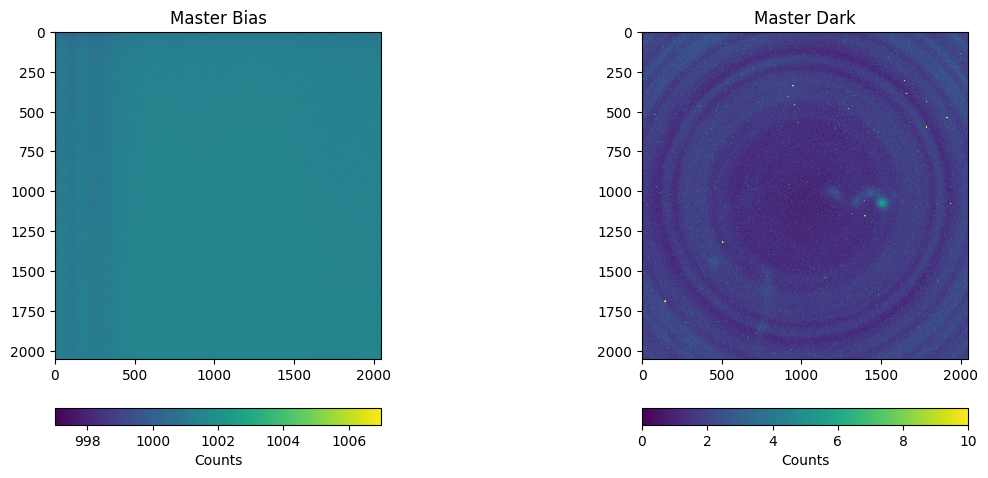

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

im0 = axes[0].imshow(masterBias)
axes[0].set_title("Master Bias")

im1 = axes[1].imshow(masterDark, vmin=0, vmax=10)
axes[1].set_title("Master Dark")

ims = [im0, im1]
for i, ax in enumerate(axes):
    cax = ax.inset_axes([0, -0.2, 1, 0.05])
    plt.colorbar(ims[i], cax=cax, orientation="horizontal", label="Counts")

plt.tight_layout()

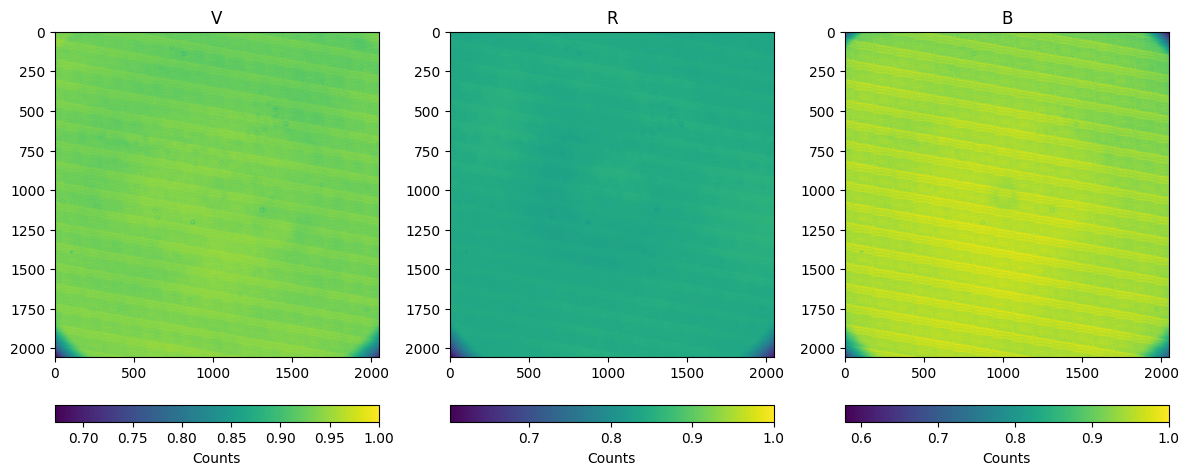

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))

im0 = axes[0].imshow(masterFlat_V)
axes[0].set_title("V")

im1 = axes[1].imshow(masterFlat_R)
axes[1].set_title("R")

im2 = axes[2].imshow(masterFlat_B)
axes[2].set_title("B")

ims = [im0, im1, im2]
for i, ax in enumerate(axes):
    cax = ax.inset_axes([0, -0.2, 1, 0.05])
    plt.colorbar(ims[i], cax=cax, orientation="horizontal", label="Counts")

plt.tight_layout()

In [7]:
ctk.SaveFits(masterBias, "../DataProducts/masterBias.fits")
ctk.SaveFits(masterDark, "../DataProducts/masterDark.fits")
ctk.SaveFits(masterFlat_V, "../DataProducts/masterFlat_V.fits")
ctk.SaveFits(masterFlat_R, "../DataProducts/masterFlat_R.fits")
ctk.SaveFits(masterFlat_B, "../DataProducts/masterFlat_B.fits")

FITS image saved to: ../DataProducts/masterBias.fits
FITS image saved to: ../DataProducts/masterDark.fits
FITS image saved to: ../DataProducts/masterFlat_V.fits
FITS image saved to: ../DataProducts/masterFlat_R.fits
FITS image saved to: ../DataProducts/masterFlat_B.fits


In [3]:
from astropy.io import fits
from natsort import natsorted
from glob import glob
import cometToolkit as ctk
import matplotlib.pyplot as plt

# Data for 2024-03-12

In [4]:
rootPath = "/home/daraghhollman/Main/CometsThesis/"

path="Data/cometData01/"

dataPaths = natsorted(glob(rootPath + path + "*.fits"))

vDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 354) % 3 == 0]
rDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 355) % 3 == 0]
bDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 356) % 3 == 0]

for i, vDataPath in enumerate(vDataPaths):
    ctk.ReduceImage(vDataPath, f"../DataProducts/ReducedImages/Day12/V/Comet62P_V0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_V.fits")


for i, rDataPath in enumerate(rDataPaths):
    ctk.ReduceImage(rDataPath, f"../DataProducts/ReducedImages/Day12/R/Comet62P_R0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_R.fits")


for i, bDataPath in enumerate(bDataPaths):
    ctk.ReduceImage(bDataPath, f"../DataProducts/ReducedImages/Day12/B/Comet62P_B0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_B.fits")

In [5]:
dataPaths = glob("/home/daraghhollman/Main/CometsThesis/Data/cometData01/field/*/*")

bField = dataPaths[:2]
vField = dataPaths[2:4]
rField = dataPaths[4:]

for i, path in enumerate(bField):
    ctk.ReduceImage(path, f"../DataProducts/ReducedImages/Day12/B/Field_B0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                     "../DataProducts/masterDark.fits",
                                                                                     "../DataProducts/masterFlat_B.fits")

for i, path in enumerate(vField):
    ctk.ReduceImage(path, f"../DataProducts/ReducedImages/Day12/V/Field_V0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                     "../DataProducts/masterDark.fits",
                                                                                     "../DataProducts/masterFlat_V.fits")

for i, path in enumerate(rField):
    ctk.ReduceImage(path, f"../DataProducts/ReducedImages/Day12/R/Field_R0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                     "../DataProducts/masterDark.fits",
                                                                                     "../DataProducts/masterFlat_R.fits")

# Data for 2024-03-13

In [7]:
rootPath = "/home/daraghhollman/Main/CometsThesis/"

path="Data/cometData02/"

dataPaths = natsorted(glob(rootPath + path + "*.fits"))

vDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 457) % 3 == 0]
rDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 458) % 3 == 0]
bDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 459) % 3 == 0]

for i, vDataPath in enumerate(vDataPaths):
    ctk.ReduceImage(vDataPath, f"../DataProducts/ReducedImages/Day13/V/Comet62P_V0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_V.fits")


for i, rDataPath in enumerate(rDataPaths):
    ctk.ReduceImage(rDataPath, f"../DataProducts/ReducedImages/Day13/R/Comet62P_R0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_R.fits")


for i, bDataPath in enumerate(bDataPaths):
    ctk.ReduceImage(bDataPath, f"../DataProducts/ReducedImages/Day13/B/Comet62P_B0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_B.fits")

In [19]:
dataPaths = glob("/home/daraghhollman/Main/CometsThesis/Data/cometData02/field/*")

vField = dataPaths[:4]
bField = dataPaths[4:10]
rField = dataPaths[10:]

for i, path in enumerate(bField):
    ctk.ReduceImage(path, f"../DataProducts/ReducedImages/Day13/B/Field_B0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                     "../DataProducts/masterDark.fits",
                                                                                     "../DataProducts/masterFlat_B.fits")

for i, path in enumerate(vField):
    ctk.ReduceImage(path, f"../DataProducts/ReducedImages/Day13/V/Field_V0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                     "../DataProducts/masterDark.fits",
                                                                                     "../DataProducts/masterFlat_V.fits")

for i, path in enumerate(rField):
    ctk.ReduceImage(path, f"../DataProducts/ReducedImages/Day13/R/Field_R0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                     "../DataProducts/masterDark.fits",
                                                                                     "../DataProducts/masterFlat_R.fits")

# Data for 2024-03-14

In [6]:
rootPath = "/home/daraghhollman/Main/CometsThesis/"

path="Data/cometData03/"

dataPaths = natsorted(glob(rootPath + path + "*.fits"))

vDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 231) % 3 == 0]
rDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 232) % 3 == 0]
bDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 233) % 3 == 0]

print(vDataPaths)
print(rDataPaths)
print(bDataPaths)

for i, vDataPath in enumerate(vDataPaths):
    ctk.ReduceImage(vDataPath, f"../DataProducts/ReducedImages/Day14/V/Comet62P_V0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_V.fits")


for i, rDataPath in enumerate(rDataPaths):
    ctk.ReduceImage(rDataPath, f"../DataProducts/ReducedImages/Day14/R/Comet62P_R0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_R.fits")


for i, bDataPath in enumerate(bDataPaths):
    ctk.ReduceImage(bDataPath, f"../DataProducts/ReducedImages/Day14/B/Comet62P_B0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_B.fits")

['/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0231.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0234.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0237.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0240.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0243.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0246.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0249.fits']
['/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0232.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0235.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0238.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0241.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0244.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData03/ucdA_0247.fits', '/home/daraghhollman/Main/CometsThesis/Data/comet

In [18]:
dataPaths = glob("/home/daraghhollman/Main/CometsThesis/Data/cometData03/field/*")

bField = dataPaths[:2]
vField = dataPaths[2:4]
rField = dataPaths[4:]

for i, path in enumerate(bField):
    ctk.ReduceImage(path, f"../DataProducts/ReducedImages/Day14/B/Field_B0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                     "../DataProducts/masterDark.fits",
                                                                                     "../DataProducts/masterFlat_B.fits")

for i, path in enumerate(vField):
    ctk.ReduceImage(path, f"../DataProducts/ReducedImages/Day14/V/Field_V0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                     "../DataProducts/masterDark.fits",
                                                                                     "../DataProducts/masterFlat_V.fits")

for i, path in enumerate(rField):
    ctk.ReduceImage(path, f"../DataProducts/ReducedImages/Day14/R/Field_R0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                     "../DataProducts/masterDark.fits",
                                                                                     "../DataProducts/masterFlat_R.fits")

# Data for 2024-03-17

In [15]:
rootPath = "/home/daraghhollman/Main/CometsThesis/"

path="Data/cometData04/"

dataPaths = natsorted(glob(rootPath + path + "*.fits"))

vDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 148) % 3 == 0]
rDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 149) % 3 == 0]
bDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 150) % 3 == 0]

for i, vDataPath in enumerate(vDataPaths):
    ctk.ReduceImage(vDataPath, f"../DataProducts/ReducedImages/Day17/V/Comet62P_V0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_V.fits")


for i, rDataPath in enumerate(rDataPaths):
    ctk.ReduceImage(rDataPath, f"../DataProducts/ReducedImages/Day17/R/Comet62P_R0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_R.fits")


for i, bDataPath in enumerate(bDataPaths):
    ctk.ReduceImage(bDataPath, f"../DataProducts/ReducedImages/Day17/B/Comet62P_B0{i}.fits", "../DataProducts/masterBias.fits",
                                                                                       "../DataProducts/masterDark.fits",
                                                                                       "../DataProducts/masterFlat_B.fits")